# Figure 1

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from ngmt.datasets import mobilised
from ngmt.modules.gsd import ParaschivIonescuGaitSequenceDetection
from ngmt.modules.icd import ParaschivIonescuInitialContactDetection
from ngmt.config import cfg_colors

In [8]:
# Read the data
file_path = (
    # r"C:\Users\Project\Desktop\Gait_Sequence\Mobilise-D dataset_1-18-2023\CHF\data.mat"
    "/mnt/neurogeriatrics_data/Mobilise-D/rawdata/sub-4005/Free-living/data.mat"
)

# Define tracking system and tracked points
tracking_sys = "SU"
tracked_points = {tracking_sys: "LowerBack"}

# Load recording data
recording = mobilised.load_recording(
    file_name=file_path, tracking_systems=[tracking_sys], tracked_points=tracked_points
)

In [13]:
# Extract lower back acceleration data
acc_data = recording.data[tracking_sys][
    [f"{tracked_points[tracking_sys][0]}_ACCEL_{x}" for x in ["x", "y", "z"]]
]
acc_data

In [16]:
# Get sampling frequency
sampling_frequency = recording.channels[tracking_sys][
    recording.channels[tracking_sys]["name"] == f"{tracked_points[tracking_sys][0]}_ACCEL_x"
]["sampling_frequency"].values[0]
sampling_frequency

100.0

In [18]:
# Gait sequence detection
gsd = ParaschivIonescuGaitSequenceDetection(target_sampling_freq_Hz=40)
gsd = gsd.detect(
    data=acc_data, sampling_freq_Hz=sampling_frequency, plot_results=False
)
gait_sequences = gsd.gait_sequences_
gsd.gait_sequences_

12 gait sequence(s) detected.


,onset,duration,event_type,tracking_systems,tracked_points
0,1322.300,6.100,gait sequence,SU,LowerBack
1,1334.275,5.075,gait sequence,SU,LowerBack
2,1712.550,5.125,gait sequence,SU,LowerBack
3,2458.550,11.000,gait sequence,SU,LowerBack
4,2483.950,7.175,gait sequence,SU,LowerBack
5,2578.800,7.650,gait sequence,SU,LowerBack
6,2600.250,4.625,gait sequence,SU,LowerBack
7,2665.725,22.275,gait sequence,SU,LowerBack
8,2692.175,583.125,gait sequence,SU,LowerBack
9,3345.925,10.225,gait sequence,SU,LowerBack


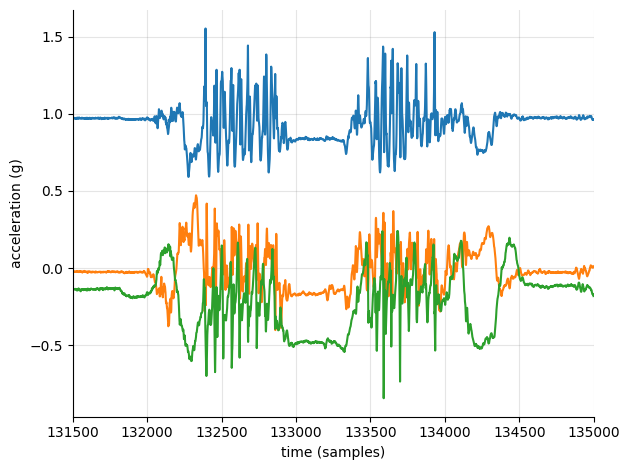

In [25]:
fig, ax = plt.subplots()
ax.axvspan(
    first_gait_sequence["onset"],
    first_gait_sequence["onset"] + first_gait_sequence["duration"],
    alpha=0.2,
    color="gray",
    label="Gait duration",
)
ax.plot(acc_data.iloc[1315*100:1350*100,:])
ax.set_xlabel("time (samples)")
ax.set_ylabel("acceleration (g)")
ax.set_xlim((131500, 135000))
ax.grid(which="both", axis="both", c="tab:gray", alpha=0.2)
ax.spines[["top", "right"]].set_visible(False)
plt.tight_layout()
plt.show()

86 gait sequence(s) detected.


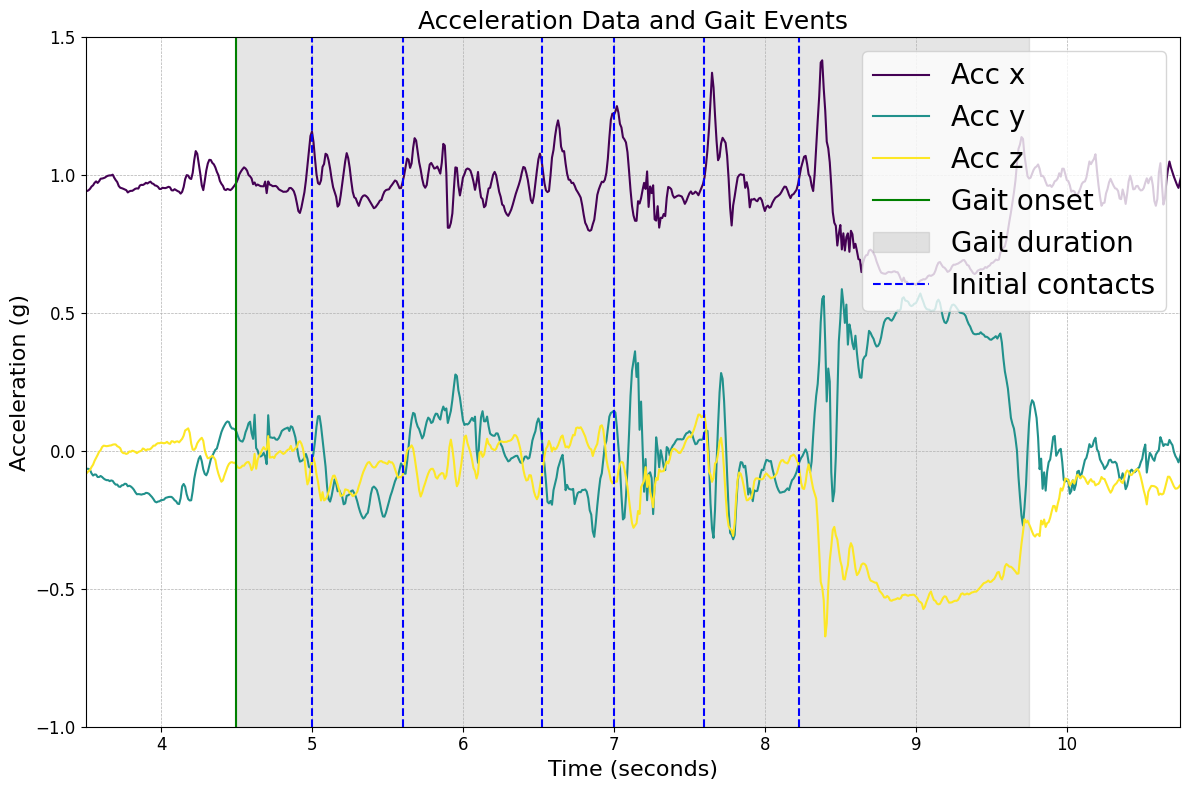

In [2]:
# Initial contact detection
icd = ParaschivIonescuInitialContactDetection(target_sampling_freq_Hz=40)
icd = icd.detect(
    data=acceleration_data,
    gait_sequences=gait_sequences,
    sampling_freq_Hz=sampling_frequency,
)
initial_contacts = icd.initial_contacts_

# Access the first detected gait sequence
first_gait_sequence = gait_sequences.iloc[0]

# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))
colors = cfg_colors["raw"]
num_samples = len(acceleration_data)
time_seconds = np.arange(num_samples) / sampling_frequency

# Initial contacts within the first gait sequence
ic_within_gait = initial_contacts[
    initial_contacts["onset"].between(
        first_gait_sequence["onset"],
        first_gait_sequence["onset"] + first_gait_sequence["duration"],
    )
]

# Plot raw acceleration data
for i in range(3):
    ax.plot(
        time_seconds,
        acceleration_data[f"LowerBack_ACCEL_{chr(120 + i)}"],
        color=colors[i],
        label=f"Acc {i + 1}",
    )

# Plot gait onset and duration
plt.axvline(first_gait_sequence["onset"], color="green", linestyle="-")
ax.axvspan(
    first_gait_sequence["onset"],
    first_gait_sequence["onset"] + first_gait_sequence["duration"],
    alpha=0.2,
    color="gray",
    label="Gait duration",
)

# Plot initial contacts within the first gait sequence
for ic_time in ic_within_gait["onset"]:
    ax.axvline(ic_time, color="blue", linestyle="--")

# Customize plot
start_limit = first_gait_sequence["onset"] - 1
end_limit = first_gait_sequence["onset"] + first_gait_sequence["duration"] + 1
ax.set_xlim(start_limit, end_limit)
ax.set_ylim(-1, 1.5)
ax.set_xlabel("Time (seconds)", fontsize=16)
ax.set_ylabel("Acceleration (g)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)
plt.title("Acceleration Data and Gait Events", fontsize=18)
ax.legend(
    ["Acc x", "Acc y", "Acc z", "Gait onset", "Gait duration", "Initial contacts"],
    fontsize=20,
    loc="upper right",
)
plt.tight_layout()

# Save the figure as a PNG
plt.savefig('fig_2.png', dpi=300, bbox_inches='tight')

# Save the figure as a PDF
plt.savefig('fig_2.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
